In [13]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
class ImageProcessor:
    """
    A class responsible for loading and preprocessing images.
    """

    def __init__(self, image_dir):
        self.image_dir = image_dir
        self.images = self.load_images()

    def load_images(self):
        """
        Load images from the specified directory.
        """
        images = []
        for file_name in os.listdir(self.image_dir):
            if file_name.endswith(('.jpg', '.jpeg', '.png')):
                image_path = os.path.join(self.image_dir, file_name)
                image = cv2.imread(image_path)
                if image is not None:
                    images.append((file_name, image))
        return images

    def preprocess_image(self, image):
        """
        Convert the image to grayscale and apply Gaussian blur.
        """
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
        return blurred_image

In [15]:
class MaskGenerator:
    """
    A class responsible for generating binary masks from preprocessed images.
    """

    def __init__(self, threshold_value=127):
        self.threshold_value = threshold_value

    def generate_mask(self, preprocessed_image):
        """
        Generate a binary mask by applying thresholding and contour detection.
        """
        _, binary_mask = cv2.threshold(preprocessed_image, self.threshold_value, 255, cv2.THRESH_BINARY)
        contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        mask = np.zeros_like(binary_mask)
        cv2.drawContours(mask, contours, -1, 255, thickness=cv2.FILLED)
        return mask

In [16]:
class Visualizer:
    """
    A class responsible for visualizing images and their corresponding masks.
    """

    def __init__(self):
        pass

    def visualize(self, original_image, mask, file_name):
        """
        Display the original image and its corresponding binary mask.
        """
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
        plt.title('Original Image')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(mask, cmap='gray')
        plt.title('Generated Mask')
        plt.axis('off')

        plt.suptitle(file_name)
        plt.show()


In [17]:
class GarmentMaskingPipeline:
    """
    The main pipeline class to handle the entire garment masking process.
    """

    def __init__(self, image_dir):
        self.image_processor = ImageProcessor(image_dir)
        self.mask_generator = MaskGenerator()
        self.visualizer = Visualizer()

    def run(self):
        """
        Run the pipeline to process images, generate masks, and visualize the results.
        """
        for file_name, image in self.image_processor.images:
            preprocessed_image = self.image_processor.preprocess_image(image)
            mask = self.mask_generator.generate_mask(preprocessed_image)
            self.visualizer.visualize(image, mask, file_name)


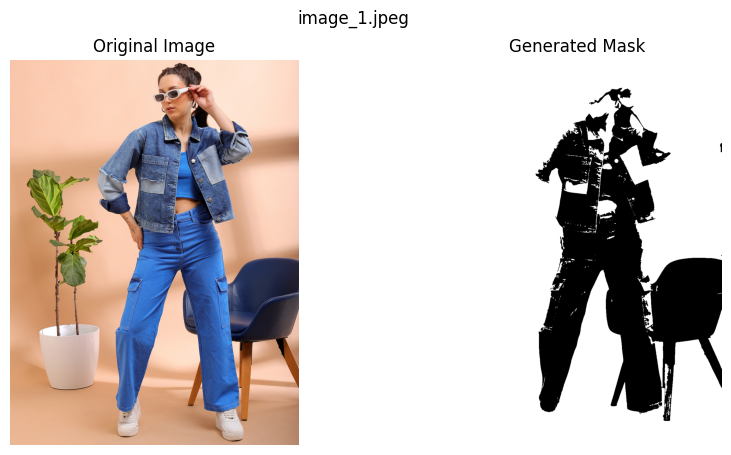

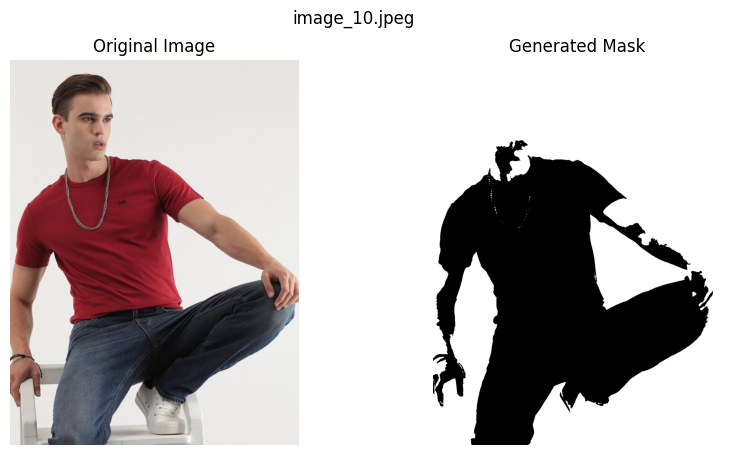

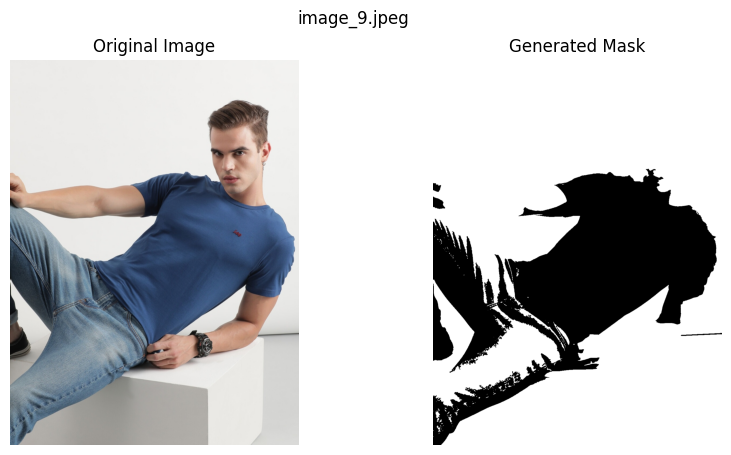

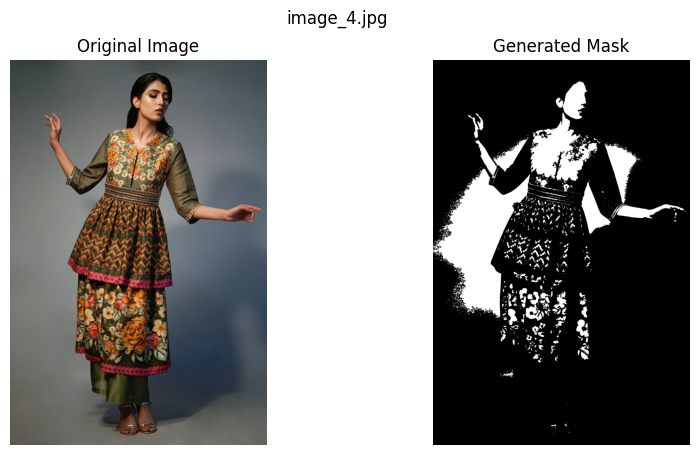

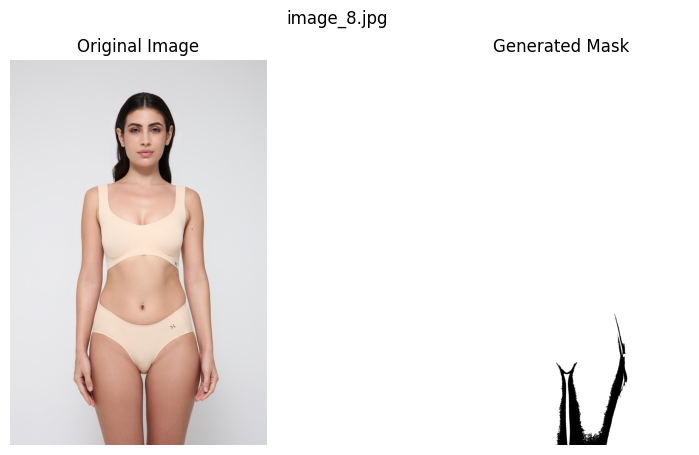

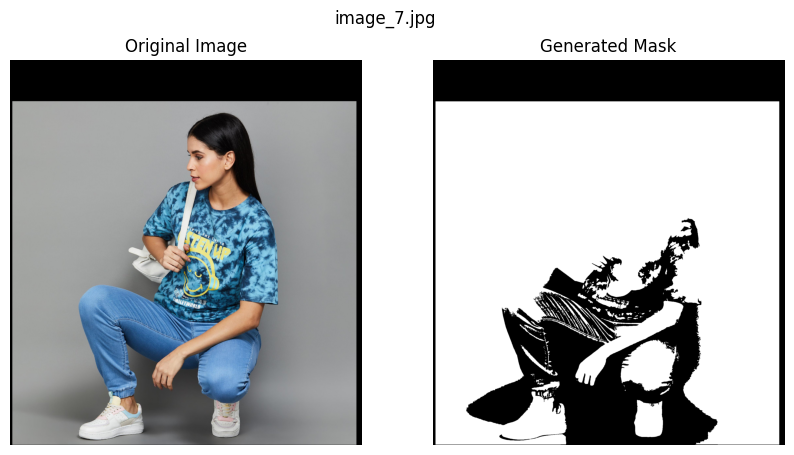

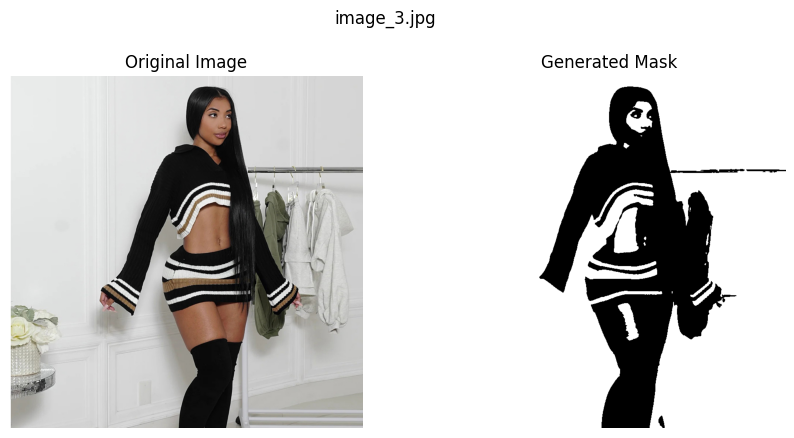

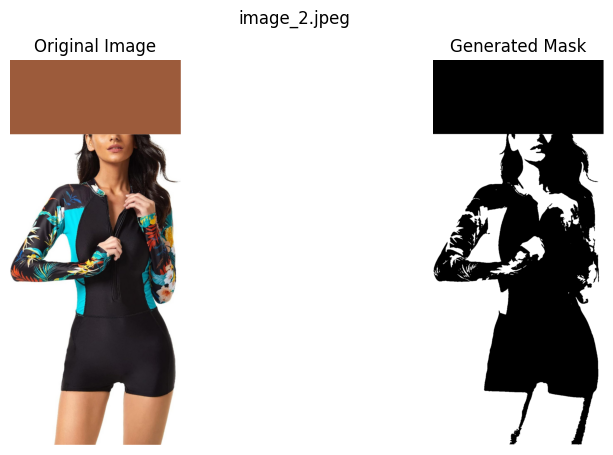

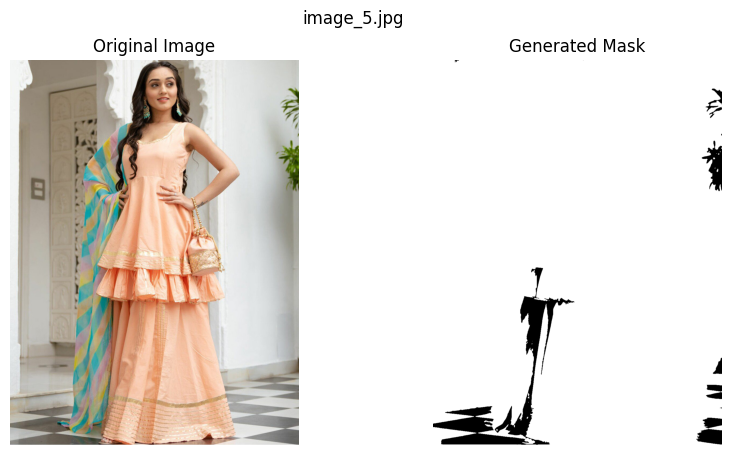

In [18]:
if __name__ == "__main__":
    image_dir = "images"  # Path to the directory containing the images
    pipeline = GarmentMaskingPipeline(image_dir)
    pipeline.run()